In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pyreadstat as pr 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics

from scipy import stats
import seaborn as sns
from scipy.stats import expon
from scipy.stats import uniform
from scipy.stats import norm

In [6]:
arc = 'compensacion-ejecutivos.sav'
df, meta = pr.read_sav(arc)
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [7]:
y = df['salario']
x = df.drop(['salario','noasiat','postgrad'],axis = 1) #Eliminamos las variables que no usaremos
x

,gpa,experien
0,3.36,15.0
1,2.35,9.0
2,3.33,10.0
3,3.37,2.0
4,3.87,4.0
...,...,...
105,3.12,2.0
106,3.36,5.0
107,2.51,3.0
108,2.89,8.0


In [8]:
reg_lin = sm.OLS(y,sm.add_constant(x)).fit()

In [11]:
print(reg_lin.summary())

OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     211.0
Date:                Sun, 12 Jul 2020   Prob (F-statistic):           7.37e-38
Time:                        17:26:40   Log-Likelihood:                -1135.4
No. Observations:                 110   AIC:                             2277.
Df Residuals:                     107   BIC:                             2285.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4968.0099   4325.267      1.149      0.253   -3606.328    1.35e+04
g

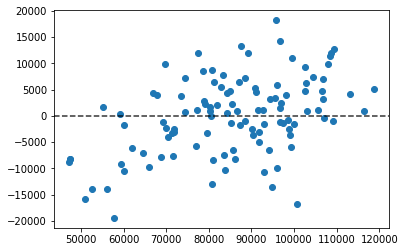

In [13]:
fig, ax = plt.subplots()
y_pred = reg_lin.predict(sm.add_constant(x))
ax.scatter(y, y - y_pred)
plt.axhline(y=0, color = 'black', alpha = 0.8, linestyle = '--')